In [20]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'1.0.11'

In [21]:
# Loaded from Step4
df_combo_sec_phase=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx', sheet_name='Fogo_FI_data')

In [22]:
df_1220_1400=pf.calculate_density_ucb(Ne_line_combo='1220_1400', df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model_1220_1400.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)

df_1117_1400=pf.calculate_density_ucb(Ne_line_combo='1117_1400', df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model_1117_1400.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)


df_1220_1447=pf.calculate_density_ucb(Ne_line_combo='1220_1447',df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model_1220_1447.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)


df_1117_1447=pf.calculate_density_ucb(Ne_line_combo='1117_1447', df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model_1117_1447.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)


1.8774102432369458e-05
7.94097962794402e-06
1.8393218264170723e-05
1.0782587274986966e-05


In [23]:
df_1220_1567=pf.calculate_density_ucb(Ne_line_combo='1220_1567',df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model_1220_1567.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)


7.1954572179199465e-06


In [24]:
# Load in microthermometry data
df_Tm=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx', sheet_name='Fogo_FI_Microtherm_data')
df_Tm['to_merge']=df_Tm['filename']

In [25]:
df_1220_1447['to_merge']=df_1220_1447['filename']
merged_df = df_Tm.merge(df_1220_1447, on='to_merge', how='right')

## This calculates the uncertainty in microthermometry - we load them from excel to save computation time

In [26]:
# First calculate density

##### - Commented out as slow -----------------################
# T_h_C=pd.Series(np.linspace(-30, 30.9782-0.21, 100))

# Av_outputs_02C, All_outputs_02C=pf.propagate_microthermometry_uncertainty(T_h_C=T_h_C,
#  error_T_h_C=0.2, N_dup=500,
# EOS='SW96', 
# error_dist_T_h_C='uniform', error_type_T_h_C='Abs', set_to_critical=True)
# Av_outputs_02C.to_excel('Av_outputs_02C.xlsx')


# Av_outputs_01C, All_outputs_01C=pf.propagate_microthermometry_uncertainty(T_h_C=T_h_C,
#  error_T_h_C=0.1, N_dup=500,
# EOS='SW96', 
# error_dist_T_h_C='uniform', error_type_T_h_C='Abs', set_to_critical=True)
# Av_outputs_01C.to_excel('Av_outputs_01C.xlsx')

##### - Commented out as slow -----------------################

Av_outputs_01C=pd.read_excel('Av_outputs_01C.xlsx')
Av_outputs_02C=pd.read_excel('Av_outputs_02C.xlsx')

In [27]:
split=np.linspace(102.3, 105.9, 100)
# Kawakami et al. 2003. 
Kaw2003=-0.03238697*split**3+ 10.08428*split**2 -  1046.189*split + 36163.67
Kaw2003_Filt=Kaw2003[(Kaw2003>=0.1) & (Kaw2003<1.21)]
Split_Kaw2003=split[(Kaw2003>=0.1) & (Kaw2003<1.21)]

# Yamamoto and Kagi 2007
YK2007=-0.01917*(split-100)**3 + 0.1984* (split-100)**2 -0.2410*(split-100)-0.341
# Lamdadrid et al. 2017
L2017=-36.42055+0.354812*split
# Fall et al. 2011

F2011=-0.0303145513*split**3 + 9.432834797*split**2 - 977.9384933*split + 33780.38242
# Rosso and Bodnar, 1995


# Wang et al. 2011
W2011=47513.64243 - 1374.824414*split + 13.25586152*split**2 - 0.04258891551*split**3
# DeVitre et al. 2021
Density_CCMR=pf.calculate_density_cornell(lab='CCMR', 
                                          corrected_split=pd.Series(split), split_err=0.00001,temp='SupCrit', CI_split=0, CI_neon=0)

Density_CMASS=pf.calculate_density_cornell(lab='CMASS', 
                                          corrected_split=pd.Series(split), split_err=0.00001,temp='SupCrit', CI_split=0, CI_neon=0)


yes


In [29]:
## How much we would expect the shift based on the correction factor
splitt=103.738
cor_1117=0.9982
cor_1220=0.9976
Diff_exp=cor_1117*splitt- cor_1220*splitt
Dens_1117=pf.calculate_density_ucb(Ne_line_combo='1117_1447', df_combo=None, temp='SupCrit', 
CI_split=0.67, CI_neon=0.67,  corrected_split=cor_1117*splitt, split_err=0)['Density g/cm3']
Dens_1117

0    0.328973
Name: Density g/cm3, dtype: float64

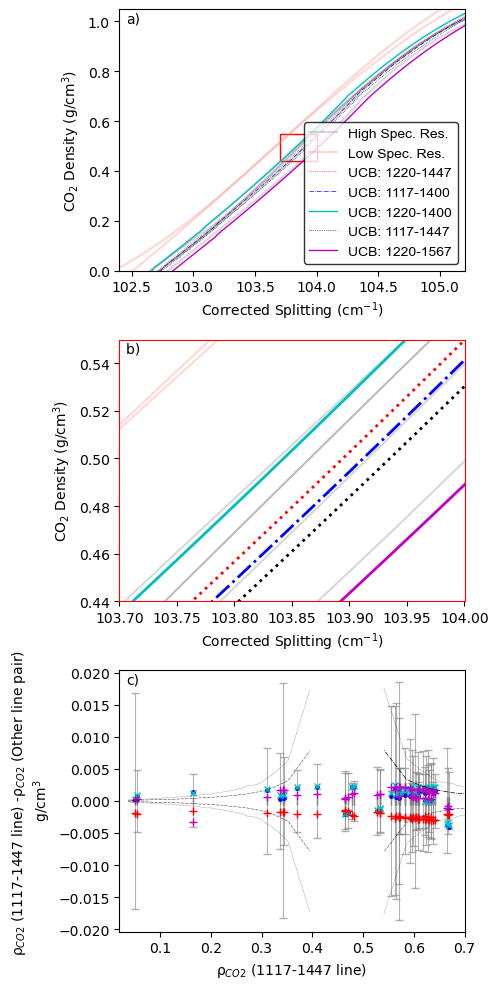

In [31]:

df_1220_1447_synthetic=pf.calculate_density_ucb(Ne_line_combo='1220_1447', corrected_split=pd.Series(split), split_err=0.00001,temp='SupCrit', CI_split=0, CI_neon=0)
df_1220_1400_synthetic=pf.calculate_density_ucb(Ne_line_combo='1220_1400', corrected_split=pd.Series(split), split_err=0.00001,temp='SupCrit', CI_split=0, CI_neon=0)
df_1220_1567_synthetic=pf.calculate_density_ucb(Ne_line_combo='1220_1567', corrected_split=pd.Series(split), split_err=0.00001,temp='SupCrit', CI_split=0, CI_neon=0)

df_1117_1400_synthetic=pf.calculate_density_ucb(Ne_line_combo='1117_1400', corrected_split=pd.Series(split), split_err=0.00001,temp='SupCrit', CI_split=0, CI_neon=0)

df_1117_1447_synthetic=pf.calculate_density_ucb(Ne_line_combo='1117_1447', corrected_split=pd.Series(split), split_err=0.00001,temp='SupCrit', CI_split=0, CI_neon=0)

fig, (ax1, ax3, ax2) = plt.subplots(3, 1, figsize=(5,10))


# Grey is high resolution -
L2017_vals=pd.Series(L2017).between(0, 0.2) 
split_series=pd.Series(split)
ax1.plot(split_series[L2017_vals], pd.Series(L2017).loc[L2017_vals], 'grey', alpha=0.3, label='High Spec. Res.') #0.57, Ne lines
ax1.plot(split, F2011, 'grey', alpha=0.3, label=None) #0.3, Ne lines
ax1.plot(split, W2011, 'grey', alpha=0.3, label=None) # 0.43  - diamond and benzonitrile
ax1.plot(split, W2011, 'grey', alpha=0.3, label=None) # 0.43  - diamond and benzonitrile
ax1.plot(split, Density_CMASS['Density g/cm3'], 'grey', alpha=0.3) # DeVitre, 0.45, Ne
ax1.plot(split, Density_CCMR['Density g/cm3'], 'grey', alpha=0.3) # DeVitre, 0.45, Ne
# yellow is low resolution 
ax1.plot(split, Kaw2003, 'salmon', alpha=0.3, label='Low Spec. Res.') #1.5 cm-1, napthalene, Chromex
ax1.plot(split, YK2007, 'salmon', alpha=0.3, label=None) #1.5 cm-1, napthalene, Chromex



# ax1.plot(split, LowT_D2021, 'grey', alpha=0.3, label=None)
# ax1.plot(split, HighT_D2021, 'grey', alpha=0.3, label=None)

ax1.plot(split, df_1220_1447_synthetic['Density g/cm3'], ':r', lw=0.5, label='UCB: 1220-1447')
ax1.plot(split, df_1117_1400_synthetic['Density g/cm3'], '-.b',  lw=0.5,  label='UCB: 1117-1400')
ax1.plot(split, df_1220_1400_synthetic['Density g/cm3'], '-c',  lw=1,  label='UCB: 1220-1400')
ax1.plot(split, df_1117_1447_synthetic['Density g/cm3'], ':k', lw=0.5,  label='UCB: 1117-1447')
ax1.plot(split, df_1220_1567_synthetic['Density g/cm3'], '-m', lw=1,  label='UCB: 1220-1567')
ax1.set_ylim([0, 1.05])
ax1.set_xlim([102.4, 105.2])

ax1.legend(
    loc='lower right',
    fontsize=11,
    prop={'family': 'Arial'},
    frameon=True,  # Ensures the box is visible
    edgecolor='black'  # Sets the border color of the legend
)

#ax1.legend()
xvar= 'Density g/cm3'#'sec since midnight'
ax2.errorbar(df_1117_1447[xvar], 0*df_1117_1447[xvar], xerr=0, yerr=df_1117_1447['σ Density g/cm3'],
             fmt='o', ecolor='grey', elinewidth=0.8,  alpha=0.6, mfc='cyan', ms=0, mec='None', capsize=3)

ax2.plot(df_1117_1447[xvar], df_1117_1447['Density g/cm3']-df_1117_1400['Density g/cm3'], 
         '.b', label='1117_1447 vs. 1117-1400', ms=5)

ax2.plot(df_1117_1447[xvar], df_1117_1447['Density g/cm3']-df_1220_1400['Density g/cm3'], 
         'xc', label='1220-1400 vs. 1117-1400', ms=5)


ax2.plot(df_1117_1447[xvar], df_1117_1447['Density g/cm3']-df_1220_1447['Density g/cm3'],
          '+r', label='1220-1447 vs. 1117-1400')


ax2.plot(df_1117_1447[xvar], df_1117_1447['Density g/cm3']-df_1220_1567['Density g/cm3'],
          '+m', label='1220-1567 vs. 1117-1447')


ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('CO$_2$ Density (g/cm$^{3}$)')


ax2.plot(Av_outputs_01C['Density_Liq_noMC'], Av_outputs_01C['Std_density_Liq_gcm3_from_percentiles'],
         '-.', color='k', lw=0.5)

ax2.plot(Av_outputs_01C['Density_Liq_noMC'], -Av_outputs_01C['Std_density_Liq_gcm3_from_percentiles'],
         '-.', color='k', lw=0.3)

ax2.plot(Av_outputs_02C['Density_Liq_noMC'], Av_outputs_02C['Std_density_Liq_gcm3_from_percentiles'],
         ':',color='k',  lw=0.3)

ax2.plot(Av_outputs_02C['Density_Liq_noMC'], -Av_outputs_02C['Std_density_Liq_gcm3_from_percentiles'],
         ':', color='k', lw=0.3)

ax2.plot(Av_outputs_01C['Density_Gas_noMC'], Av_outputs_01C['Std_density_Gas_gcm3_from_percentiles'],
         '-.',color='k',  lw=0.3)

ax2.plot(Av_outputs_01C['Density_Gas_noMC'], -Av_outputs_01C['Std_density_Gas_gcm3_from_percentiles'],
         '-.',color='k',  lw=0.3)

ax2.plot(Av_outputs_02C['Density_Gas_noMC'], Av_outputs_02C['Std_density_Gas_gcm3_from_percentiles'],
         ':', color='k',  lw=0.3)

ax2.plot(Av_outputs_02C['Density_Gas_noMC'], -Av_outputs_02C['Std_density_Gas_gcm3_from_percentiles'],
         ':', color='k',  lw=0.3)


ax2.set_xlabel('ρ$_{CO2}$ (1117-1447 line)')
ax2.set_ylabel('ρ$_{CO2}$ (1117-1447 line) -ρ$_{CO2}$ (Other line pair) \n g/cm$^{3}$ ')
ax2.set_xlim([0.02, 0.7])

# Lets add a wee little plot
import matplotlib.patches as patches
rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none', label='test')
# Add the patch to the Axesz
x1=103.7
x2=104.
y1=0.44
y2=0.55
rect = patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none', label='test')
ax1.add_patch(rect)

## Lets do another at low densities. 

# x3=102.7
# x4=103.1
# y3=0
# y4=0.2
# rect = patches.Rectangle((x3,y3),x4-x3,y4-y3,linewidth=1,edgecolor='k',facecolor='none', label='test')
# ax1.add_patch(rect)

## Now lets plot a zoom in 
ax3.plot(split_series[L2017_vals], pd.Series(L2017_vals).loc[L2017_vals], 'grey', alpha=0.3, label='High Spec. Res.') #0.57, Ne lines
ax3.plot(split, F2011, 'grey', alpha=0.3, label=None) #0.3, Ne lines
ax3.plot(split, W2011, 'grey', alpha=0.3, label=None) # 0.43  - diamond and benzonitrile
ax3.plot(split, W2011, 'grey', alpha=0.3, label=None) # 0.43  - diamond and benzonitrile
ax3.plot(split, Density_CMASS['Density g/cm3'], 'grey', alpha=0.3) # DeVitre, 0.45, Ne
ax3.plot(split, Density_CCMR['Density g/cm3'], 'grey', alpha=0.3) # DeVitre, 0.45, Ne
# yellow is low resolution 
ax3.plot(split, Kaw2003, 'salmon', alpha=0.3, label='Low Spec. Res.') #1.5 cm-1, napthalene, Chromex
ax3.plot(split, YK2007, 'salmon', alpha=0.3, label=None) #1.5 cm-1, napthalene, Chromex


ax3.plot(split, df_1220_1447_synthetic['Density g/cm3'], ':r', lw=2, label='1220-1447')
ax3.plot(split, df_1117_1400_synthetic['Density g/cm3'], '-.b',  lw=2,  label='1117-1447')
ax3.plot(split, df_1220_1400_synthetic['Density g/cm3'], '-c',  lw=2,  label='1220-1400')
ax3.plot(split, df_1117_1447_synthetic['Density g/cm3'], ':k', lw=2,  label='1117-1447')
ax3.plot(split, df_1220_1567_synthetic['Density g/cm3'], '-m', lw=2,  label='1220-1567')

ax3.set_ylim([y1, y2])
ax3.set_xlim([x1, x2])

for spine in ax3.spines.values():
    spine.set_edgecolor('red')

## Now lets do the lower density zoom in 
#ax3.legend()

ax3.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.set_ylabel('CO$_2$ Density (g/cm$^{3}$)')

ax1.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax2.annotate("c)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax3.annotate("b) ", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

fig.tight_layout()
fig.savefig('Different_Ne_correction_factors.png', dpi=300)